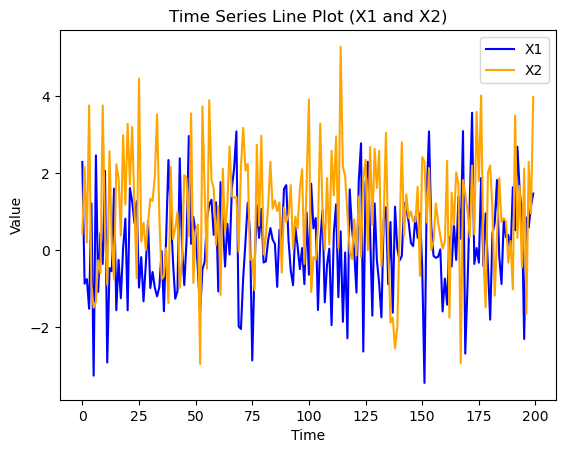

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


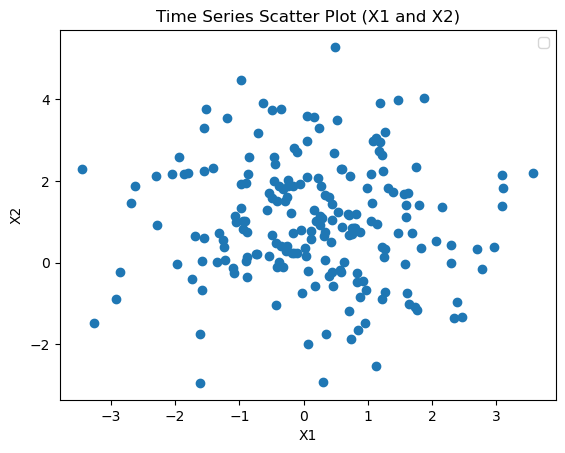

In [13]:
# 3.4.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1)

# Parameters for the distributions
mean_X1 = 0
variance_X1 = 2
mean_X2 = 1
variance_X2 = 2
n_points = 200

# Generate the data points
X1 = np.random.normal(loc=mean_X1, scale=np.sqrt(variance_X1), size=n_points)
X2 = np.random.normal(loc=mean_X2, scale=np.sqrt(variance_X2), size=n_points)

# Plot the time series
plt.figure()
plt.plot(X1, label='X1', color='blue')
plt.plot(X2, label='X2', color='orange')
plt.title('Time Series Line Plot (X1 and X2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots/Cluster_TimeSeries.png')
plt.show()

# Scatter plot
plt.figure()
plt.scatter(X1, X2)
plt.title('Time Series Scatter Plot (X1 and X2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.savefig('plots/Cluster_Scatter.png')
plt.show()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\clu

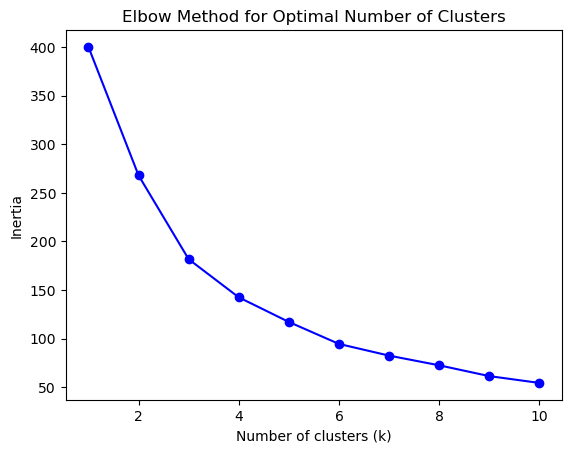

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Merge both series
combined_series=np.column_stack((X1,X2))

# Standardize the data. Modify so mean of series is 0 and variance is 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_series)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure()
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.savefig('plots/Cluster_kmeans_elbow.png')
plt.show()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


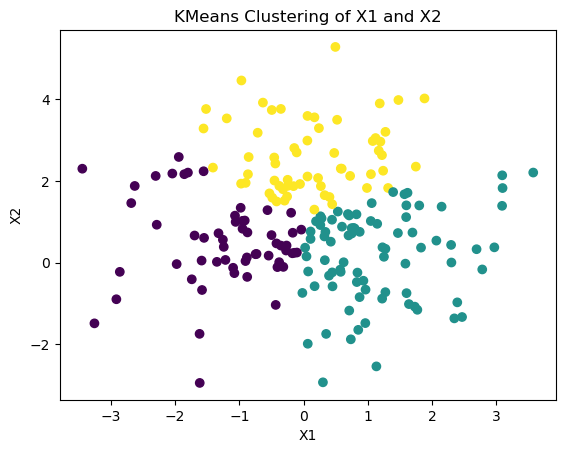

In [15]:
# From the Elbow plot, OPtimal K is found
optimal_k = 3

# Apply KMeans with the optimal number of clusters
k_means = KMeans(n_clusters=optimal_k)
k_clusters = k_means.fit_predict(scaled_data)

# Plot the clustered data
plt.figure()
plt.scatter(X1, X2, c=k_clusters, cmap = 'viridis')
plt.title('KMeans Clustering of X1 and X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('plots/Cluster_kmeans.png')
plt.show()


Anomalies: 
 [[-2.64627014 -1.6957103 ]
 [ 0.26796137  2.93285798]
 [-2.79274523  0.8938159 ]
 [ 1.34583122  2.07020401]]


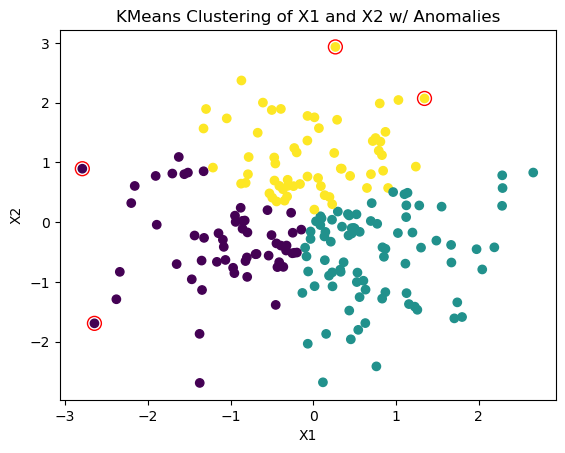

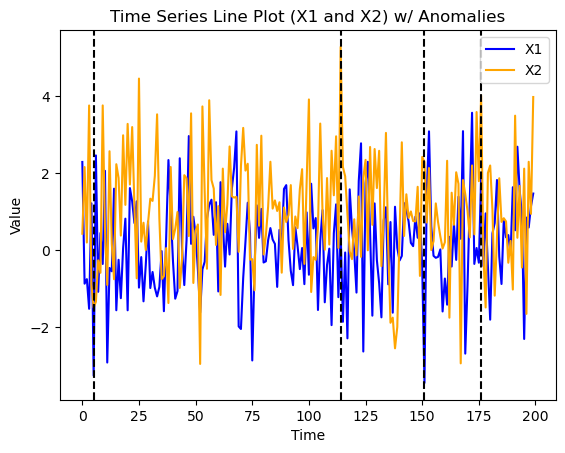

In [16]:
from pandas import Series

# Calculate the euclidean distance of each point to its nearest centroid
k_centroids = kmeans.cluster_centers_
k_data_to_centroid_distances = np.linalg.norm(scaled_data - k_centroids[k_clusters], axis=1)

# Set outlier ratio
outlier_ratio = 2 # %
# Determine data point outliers
k_threshold = np.percentile(k_data_to_centroid_distances, 100 - outlier_ratio)
# Separate anomalies and normal data points
k_anomalies = scaled_data[k_data_to_centroid_distances > k_threshold]
k_normal = scaled_data[k_data_to_centroid_distances <= k_threshold]

print("Anomalies: \n", k_anomalies)

# Scatter plot
plt.figure()
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=k_clusters, cmap = 'viridis')
plt.scatter(k_anomalies[:,0], k_anomalies[:,1], edgecolor='red', facecolors='none', s=100, label='Outliers')
plt.title('KMeans Clustering of X1 and X2 w/ Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('plots/Cluster_kmeans_w_anomalies.png')
plt.show()

# Plot the time series with anomalies
# Identify which index the anomalies have been found
anomaly_index = np.where(k_data_to_centroid_distances > k_threshold)[0]
time = np.arange(n_points)

plt.figure()
plt.plot(X1, label='X1', color='blue')
plt.plot(X2, label='X2', color='orange')
for index in anomaly_index:
    plt.axvline(x=time[index], color='black', linestyle='--')
plt.title('Time Series Line Plot (X1 and X2) w/ Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots/Cluster_Kmeans_TimeSeries_with_anomalies.png')
plt.show()


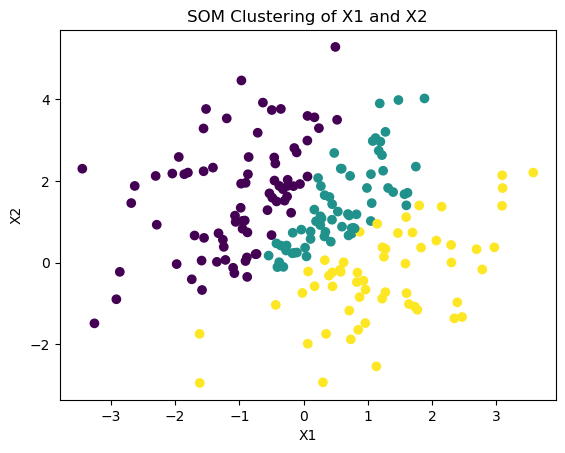

In [17]:
from sklearn_som.som import SOM

# Initialize and train the SOM
som = SOM(m=3, n=1, dim=2)
som.fit(scaled_data)
s_clusters = som.predict(scaled_data)
s_centroids = som.cluster_centers_.reshape(-1, 2)

# Plot clusters
plt.figure()
plt.scatter(X1, X2, c=s_clusters, cmap='viridis')
plt.title('SOM Clustering of X1 and X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('plots/Cluster_som.png')
plt.show()


Anomalies: 
 [[-2.64627014 -1.6957103 ]
 [-1.3726856  -2.69299129]
 [ 0.26796137  2.93285798]
 [ 2.66100498  0.82934914]]


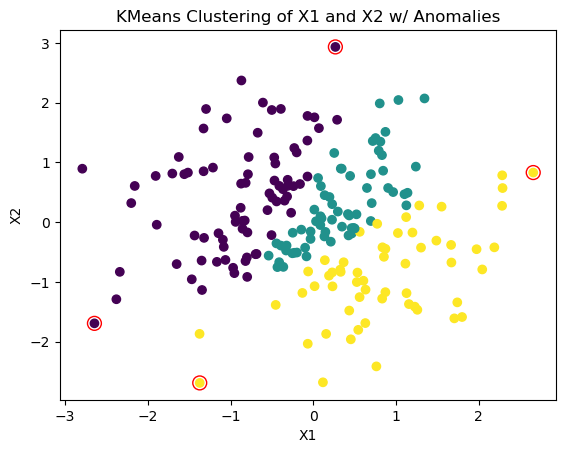

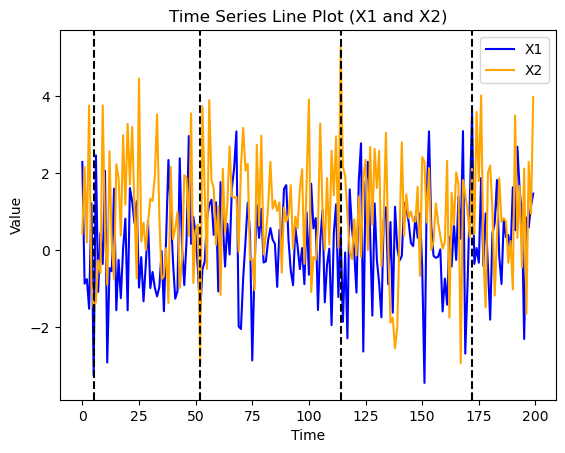

In [18]:
# Calculate distances to their respective BMUs
s_data_to_centroid_distances = np.linalg.norm(scaled_data - s_centroids[s_clusters], axis=1)

# Set outlier ratio
outlier_ratio = 2 # %
# Determine data point outliers
s_threshold = np.percentile(s_data_to_centroid_distances, 100 - outlier_ratio)
# Separate anomalies and normal data points
s_anomalies = scaled_data[s_data_to_centroid_distances > s_threshold]
s_normal = scaled_data[s_data_to_centroid_distances <= s_threshold]

print("Anomalies: \n", s_anomalies)

# Scatter plot
plt.figure()
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=s_clusters, cmap = 'viridis')
plt.scatter(s_anomalies[:,0], s_anomalies[:,1], edgecolor='red', facecolors='none', s=100, label='Outliers')
plt.title('KMeans Clustering of X1 and X2 w/ Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.savefig('plots/Cluster_som_w_anomalies.png')
plt.show()

# Plot the time series with anomalies
# Identify which index the anomalies have been found
anomaly_index = np.where(s_data_to_centroid_distances > s_threshold)[0]
time = np.arange(200)

plt.figure()
plt.plot(X1, label='X1', color='blue')
plt.plot(X2, label='X2', color='orange')
for index in anomaly_index:
    plt.axvline(x=time[index], color='black', linestyle='--')
plt.title('Time Series Line Plot (X1 and X2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.savefig('plots/Cluster_SOM_TimeSeries_w_anomalies.png')
plt.show()